# Global Root-zone moisture Analysis & Forecasting System (GRAFS)

* **Products used:**
[GRAFS](http://dap.nci.org.au/thredds/remoteCatalogService?catalog=http://dapds00.nci.org.au/thredds/catalog/ub8/global/GRAFS/catalog.xml), 
[ERA5](https://registry.opendata.aws/ecmwf-era5/)

*Both datasets are external to the Digital Earth Africa platform.*

## Background

Soil moisture is a measure of water stored in the soil zone that is accessible to plant roots, making it a major contributing factor to plant health and crop yield.

The Global Root-zone moisture Analysis & Forecasting System (GRAFS) is produced by the [ANU Centre for Water and Landscape Dynamics](http://wald.anu.edu.au/).
The model estimates the surface (0-5 cm) and root-zone (0-1 m) soil moisture at 10 km spatial resolution globally, using the precipitation measured by the Global Precipitation Measurement (GPM) mission and through assimilation of the soil moisture product from the [Soil Moisture Active/Passive](https://smap.jpl.nasa.gov/mission/description/) (SMAP) mission.

This product is regularly updated and made available through National Computational Infrastructure's open access THREDDS data server.

For more information on this product, contact [Luigi Renzullo](mailto:Luigi.Renzullo@anu.edu.au) and [Siyuan Tian](mailto:siyuan.tian@anu.edu.au).

## Description

This notebook demonstrates the following steps:
1. Retrieval of surface and root-zone wetness through NCI's THREDDS OPeNDAP service
2. Compare soil moisture to precipitation data from ERA5

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import datacube

from deafrica_tools.load_era5 import load_era5
from deafrica_tools.load_soil_moisture import load_soil_moisture

### Analysis parameters

Define location and time period of interest.
The time period is chosen to be less than a year to limit ERA5 data download.

In [2]:
# Define the analysis region (Lat-Lon box)

# Il Ngwesi region of Kenya - Rhino Project
lat = (0.412, 0.266)
lon = (37.32, 37.40)

# High Energy Stereoscopic System site near Windhoek Namibia
#lat = (-23.28, -23.26)
#lon = (16.49, 16.51)

# Define the time window
time = '2018-07-01', '2019-05-31'

## Retrieval of surface and root-zone wetness

> `Surface wetness` is measured relative to wettest condition recorded for a location.

> `Rootzone Soil Water Index` is derived from surface relative wetness

In [3]:
# Retrieve surface soil moisture using query parameters
surface_wetness = load_soil_moisture(lat, lon, time, grid='nearest')

https://dapds00.nci.org.au/thredds/dodsC/ub8/global/GRAFS/GRAFS_TopSoilRelativeWetness_2018.nc
https://dapds00.nci.org.au/thredds/dodsC/ub8/global/GRAFS/GRAFS_TopSoilRelativeWetness_2019.nc


In [4]:
# retrieve rootzone soil moisture using query parameters
rootzone_wetness = load_soil_moisture(lat, lon, time, product='rootzone', grid='nearest')

https://dapds00.nci.org.au/thredds/dodsC/ub8/global/GRAFS/GRAFS_RootzoneSoilWaterIndex_2018.nc
https://dapds00.nci.org.au/thredds/dodsC/ub8/global/GRAFS/GRAFS_RootzoneSoilWaterIndex_2019.nc


### Plot surface and root-zone wetness over time

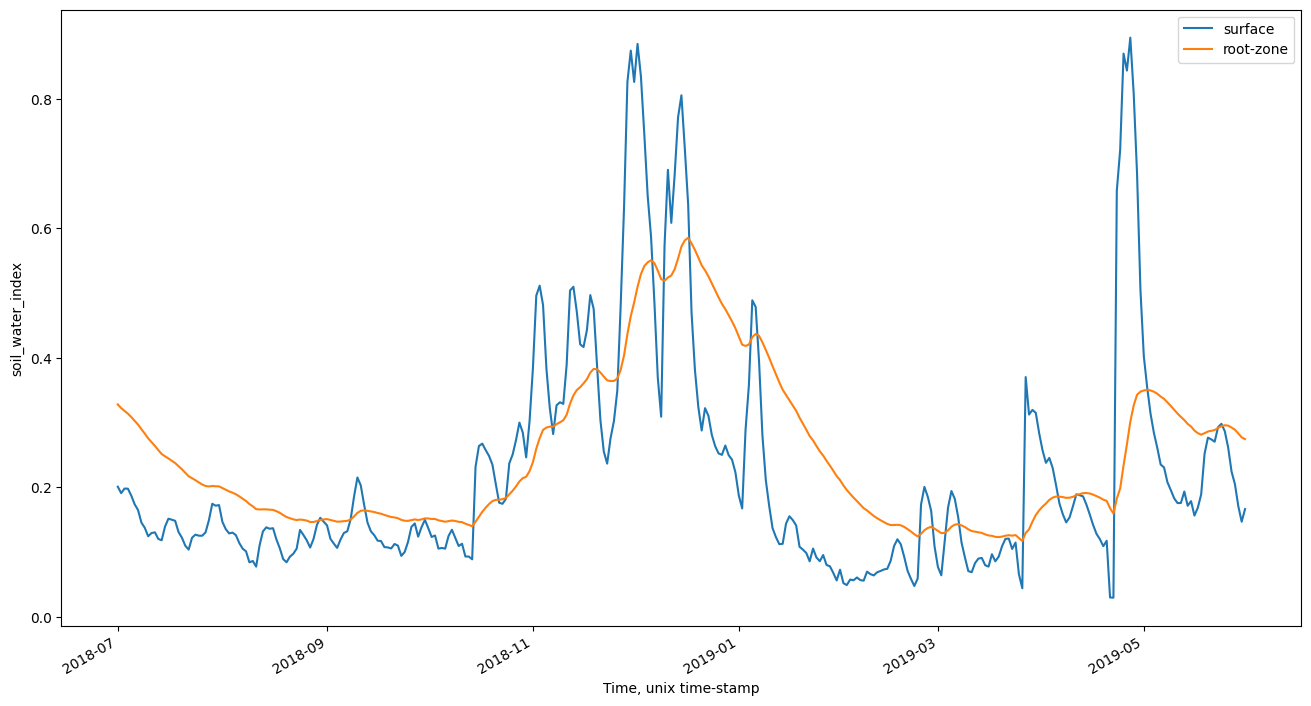

In [5]:
surface_wetness.relative_wetness.mean(['lat','lon']).plot(figsize=(16,8), label='surface');
rootzone_wetness.soil_water_index.mean(['lat','lon']).plot(label='root-zone');
plt.legend()

## Compare soil moisture to precipitation data from ERA5

The first cell will load the precipitation parameter, `precipitation_amount_1hour_Accumulation`, from ERA5. Depending on the size of your query, this step can take a few minutes to complete. Data will be stored in the folder `era5`.

In [6]:
# load precipitation data from ERA5
var_precipitation = 'precipitation_amount_1hour_Accumulation'
precipitation = load_era5(var_precipitation, lat, lon, time, reduce_func=np.sum)

# Convert from Meters (m) to Millimeters (mm)
precipitation[var_precipitation]=precipitation[var_precipitation]*1000

### Plot soil moisture with precipitation

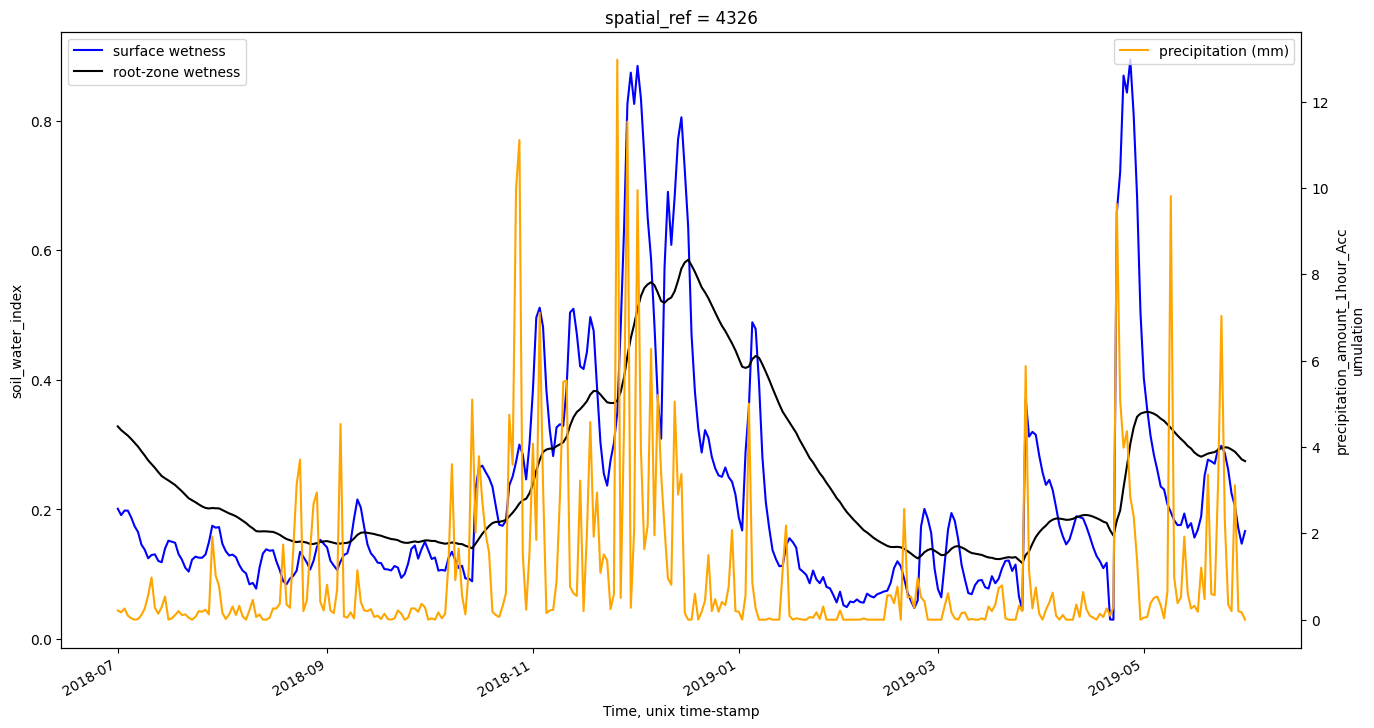

In [7]:
# plot soil moisture with precipitation

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()
surface_wetness.relative_wetness.mean(['lat','lon']).plot(ax = ax1, label = 'surface wetness', color = 'blue');
rootzone_wetness.soil_water_index.mean(['lat','lon']).plot(ax = ax1, label = 'root-zone wetness', color = 'black');
precipitation[var_precipitation].mean(['lat','lon']).plot(ax = ax2, label = 'precipitation (mm)', color = 'orange');
ax1.legend()
ax2.legend();

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [8]:
print(datacube.__version__)

1.8.12


**Last Tested:**

In [9]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2023-03-30'